In [183]:
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import inspect

from sqlalchemy import create_engine, func

engine = create_engine('sqlite:///../data/Aquastat.sqlite')

Base=automap_base()
Base.prepare(engine, reflect = True)
inspector = inspect(engine)
inspector.get_table_names()
session=Session(engine)
conn = engine.connect()

In [203]:
data=conn.execute('SELECT country, gdp_per_cap, water_stress FROM Aquastat'+\
                 '').fetchall()

In [185]:
d = {}
for a, b, c in data:
    d.setdefault(a, []).append(b)
e = {}
for a, b, c in data:
    e.setdefault(a, []).append(c)
f = {'hdi':d, 'nri':e}


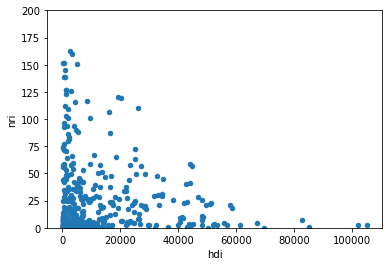

In [206]:
df=pd.DataFrame().from_records(data,columns=[['country', 'hdi','nri']])
import matplotlib.pyplot as plt
df.plot(kind='scatter', x='hdi', y='nri')
plt.ylim(0,200)
#plt.xlim(1,100)
plt.show()

In [ ]:
#gdp and water stress